In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from fairaudit import Auditor
from fairaudit.groups import get_intersections
from fairaudit.metrics import Metric

In [2]:
import folktables

data_source = folktables.ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
ca_data = data_source.get_data(states=["CA"], download=True)

ModuleNotFoundError: No module named 'folktables'

In [18]:
from sklearn.linear_model import LogisticRegression

from folktables import ACSIncome

ca_features, ca_labels, _ = ACSIncome.df_to_numpy(ca_data)

# Plug-in your method for tabular datasets
model = LogisticRegression()

n_train = 20000

x_train = ca_features[0:n_train]
y_train = ca_labels[0:n_train]

x_test = ca_features[n_train:len(ca_features)]
y_test = ca_labels[n_train:len(ca_features)]
# Train on CA data
model.fit(x_train, y_train)

# Test on remaining CA data
model.score(x_test, y_test)

/opt/src/miniconda3/envs/fairaudit/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7457034696723878

In [20]:
ACSIncomeReg = folktables.BasicProblem(
    features=[
        'AGEP',
        'COW',
        'SCHL',
        'MAR',
        'OCCP',
        'POBP',
        'RELP',
        'WKHP',
        'SEX',
        'RAC1P',
    ],
    target='PINCP',
    group='RAC1P',
    preprocess=folktables.adult_filter,
    postprocess=lambda x: np.nan_to_num(x, -1),
)

In [26]:
ca_features, ca_labels, _ = ACSIncomeReg.df_to_numpy(ca_data)

from sklearn.linear_model import LinearRegression

n_train = 20000

model = LinearRegression()

x_train = ca_features[0:n_train]
y_train = ca_labels[0:n_train]

x_test = ca_features[n_train:len(ca_features)]
y_test = ca_labels[n_train:len(ca_features)]
# Train on CA data
model.fit(x_train, y_train)

# Test on remaining CA data
np.sqrt(np.mean((model.predict(x_test) - y_test)**2))

75501.51010861757

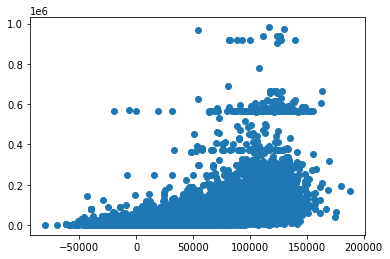

In [28]:
import matplotlib.pyplot as plt

plt.scatter(model.predict(x_train), y_train)